In [104]:
import lightgbm
import pandas as pd
import numpy as np

In [105]:
init_record = pd.read_csv("../../Data/LWB_Monthly_data.csv")


In [106]:
init_record['_key_occurreddate_month']=init_record['_key_occurreddate_month'].astype("datetime64[ns]")
init_record = init_record.set_index(['_key_client_id', '_key_occurreddate_month'])

# Try reduce columns

In [107]:
#selected = pd.concat([init_record.filter(regex=r'allrows', axis=1), init_record["response_variable"]], axis = 1)
#selected = init_record.drop(init_record.filter(regex=r'allrows', axis=1),axis = 1)
#selected

In [108]:
def construct_feature_label(data):
    y = []
    clientList = list(set(data.index.get_level_values(0)))
    data['response_variable'] = data.groupby(level=0)['response_variable'].shift(-1)  
    data = data.groupby(level=0, as_index=False).apply(lambda group: group.iloc[:-1])
    #print(data.loc["0000D172-EA88-432F-8235-9FAA00D29072"]['response_variable'])
    y = data['response_variable']
    x = data.drop('response_variable',axis='columns')
    return x, y

feature, label = construct_feature_label(init_record)


# PCA

In [109]:
from sklearn import decomposition


In [110]:
#pca = decomposition.PCA(n_components=0.9)
#feature_pca = pca.fit_transform(feature)

# Model

In [111]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, confusion_matrix, roc_curve,accuracy_score


In [112]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(feature)

IsolationForest(contamination=0.1, n_estimators=50)

In [126]:
y_hat = model.predict(feature)
y_score = model.decision_function(feature)

/Users/chenqinzhang/opt/anaconda3/envs/sem2_2020/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chenqinzhang/opt/anaconda3/envs/sem2_2020/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


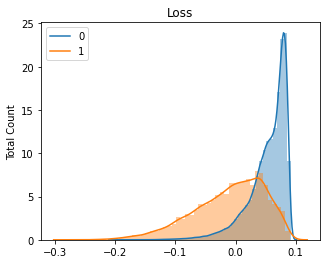

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 4))
for i in [0,1]:
    sns.distplot(y_score[label==i], bins=50,kde=True)
ax.set_ylabel('Total Count')
ax.set_title('Loss')
ax.legend('01')

In [125]:
y_hat = np.where(y_hat == -1, 1, 0) 

In [124]:

f1_score(label, y_hat)

0.0

In [116]:
confusion_matrix(label,y_hat)

array([[94866,  6857],
       [ 4049,  4134]])

In [117]:
accuracy_score(label,y_hat)

0.9007697486943388

In [118]:
# Try rollout Data